# Spotify Top Hits Analysis
### The goal of this analysis is to see how music tastes have changed from 2000-2023

In [28]:
#Imports 
import pandas as pd
import numpy as np
import ydata_profiling
import sklearn
from tabulate import tabulate
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Data Analysis

In [29]:
spotify_df = df = pd.read_csv('spotify_songs.csv', encoding='ISO-8859-1')
spotify_df.head(10)

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,81,Oops!... I Did It Again,26dSoYclwsYLMAKD3tpOr4,Britney Spears,"['dance pop', 'pop']",81,...,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,211160,4
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,83,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,...,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067,4
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,66,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",62,...,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547,4
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,0v1XpBHnsbkCn7iJ9Ucr1l,It's My Life,81,Crush,58lV9VcRSjABbAbfWS6skp,Bon Jovi,"['glam metal', 'rock']",79,...,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,224493,4
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,75,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",70,...,-4.843,0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400,4
5,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,5Mmk2ii6laakqfeCT7OnVD,Thong Song,71,Unleash The Dragon,6x9QLdzo6eBZxJ1bHsDkjg,Sisqo,"['contemporary r&b', 'dirty south rap', 'hip p...",58,...,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,253733,4
6,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,87,The Marshall Mathers LP,7dGJo4pcD2V6oG8kP0tJRR,Eminem,"['detroit hip hop', 'hip hop', 'rap']",90,...,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,284200,4
7,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7oQSevUCbYs4QawXTHQVV1,Rock DJ,56,Sing When You're Winning,2HcwFjNelS49kFbfvMxQYw,Robbie Williams,"['dance rock', 'europop']",71,...,-4.307,1,0.0326,0.02600,0.000000,0.0981,0.842,103.032,260560,4
8,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7H6ev70Weq6DdpZyyTmUXk,Say My Name,81,The Writing's On The Wall,1Y8cdNmUJH7yBTd9yOvr5i,Destiny's Child,"['dance pop', 'girl group', 'pop', 'r&b', 'urb...",72,...,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,271333,4
9,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,90,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",88,...,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773,4


In [30]:
spotify_df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2011.500000,70.277083,75.882500,0.661767,0.688705,5.238333,-5.811735,0.589167,0.097995,0.164838,0.013442,0.174978,0.536023,120.456363,224695.583750,3.975000
std,6.923629,12.958245,12.016746,0.140335,0.165345,3.596909,2.086712,0.492088,0.093276,0.210630,0.082364,0.134153,0.228995,27.640203,41652.938998,0.240276
min,2000.000000,0.000000,36.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.750000,65.000000,68.000000,0.573750,0.585000,2.000000,-6.846000,0.000000,0.037900,0.018075,0.000000,0.090475,0.359750,98.061500,199050.500000,4.000000
50%,2011.500000,72.000000,77.000000,0.673000,0.706000,5.000000,-5.526500,1.000000,0.056800,0.073600,0.000000,0.120500,0.544000,120.000000,220953.500000,4.000000
75%,2017.250000,78.000000,85.000000,0.760000,0.814000,8.000000,-4.381750,1.000000,0.115000,0.233000,0.000057,0.225000,0.726000,137.644500,245467.000000,4.000000
max,2023.000000,96.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.979000,0.974000,210.857000,613027.000000,5.000000


## Data Cleaning

In [31]:
spotify_df.drop(['playlist_url', 'track_id', 'album', 'artist_id', 'artist_genres', 'artist_popularity'], axis=1, inplace=True)

In [32]:
print(spotify_df.columns)

Index(['year', 'track_name', 'track_popularity', 'artist_name', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')


## Data Analysis (Clustering)

In [33]:
def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(data[['loudness', 'danceability', 'tempo', 'duration_ms']])
    return data

clustered_data = []

for year in range(2000, 2024):
    yearly_data = spotify_df[spotify_df['year'] == year].copy()
    clustered_data.append(apply_kmeans(yearly_data, n_clusters=3))

clustered_data = pd.concat(clustered_data)

clustered_data.head()

,year,track_name,track_popularity,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,2000,Oops!...I Did It Again,81,Britney Spears,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,211160,4,2
1,2000,All The Small Things,83,blink-182,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,167067,4,2
2,2000,Breathe,66,Faith Hill,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,250547,4,1
3,2000,It's My Life,81,Bon Jovi,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,224493,4,2
4,2000,Bye Bye Bye,75,*NSYNC,0.610,0.926,8,-4.843,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,200400,4,2


<Figure size 1400x700 with 0 Axes>

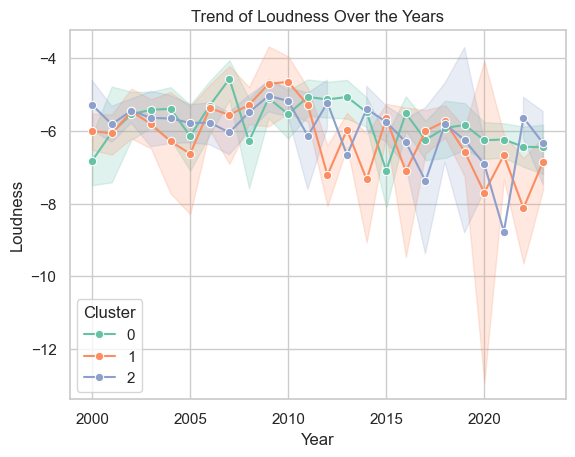

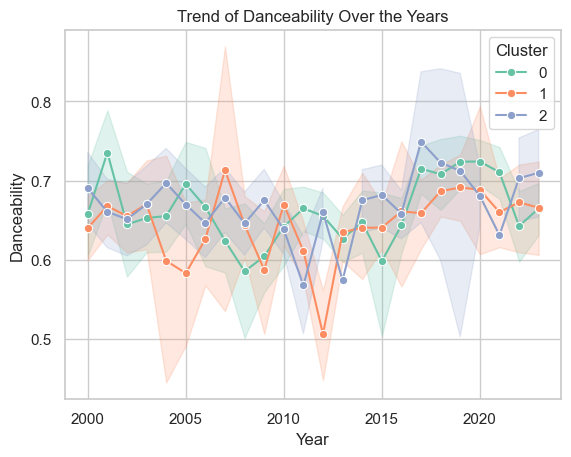

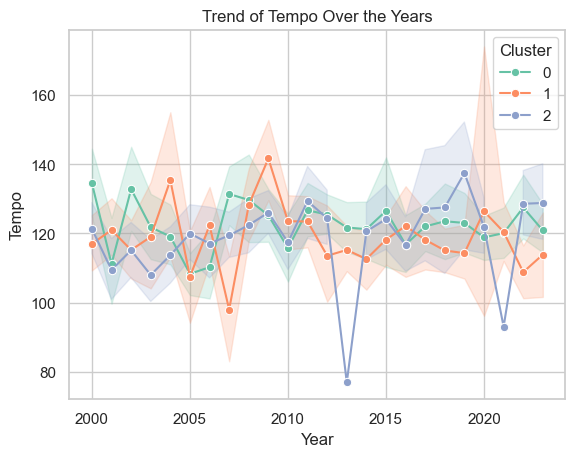

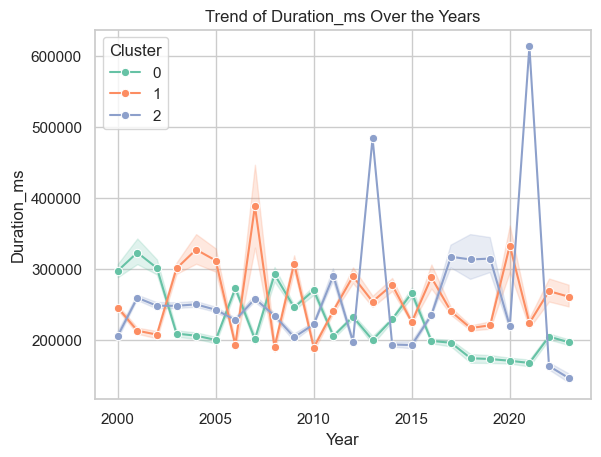

In [34]:
def plot_trends(clustered_data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 7))

    for feature in ['loudness', 'danceability', 'tempo', 'duration_ms']:
        plt.figure()
        sns.lineplot(x='year', y=feature, hue='cluster', data=clustered_data, palette='Set2', marker='o')
        plt.title(f'Trend of {feature.capitalize()} Over the Years')
        plt.xlabel('Year')
        plt.ylabel(feature.capitalize())
        plt.legend(title='Cluster')
        plt.show()

plot_trends(clustered_data)